In [6]:
import pandas as pd
import numpy as np

%store -r NSL2021
NSL2021

,Day,BZN|NO2 > BZN|GB [MW],BZN|GB > BZN|NO2 [MW]
0,01.01.2021 00:00 - 01.01.2021 01:00,NaN,NaN
1,02.01.2021 00:00 - 02.01.2021 01:00,NaN,NaN
2,03.01.2021 00:00 - 03.01.2021 01:00,NaN,NaN
3,04.01.2021 00:00 - 04.01.2021 01:00,NaN,NaN
4,05.01.2021 00:00 - 05.01.2021 01:00,NaN,NaN
...,...,...,...
360,27.12.2021 00:00 - 27.12.2021 01:00,10487.0,0.0
361,28.12.2021 00:00 - 28.12.2021 01:00,13768.0,0.0
362,29.12.2021 00:00 - 29.12.2021 01:00,15040.0,0.0
363,30.12.2021 00:00 - 30.12.2021 01:00,9458.0,4581.0


In [7]:
%store -r NSL2022
NSL2022

,Day,BZN|NO2 > BZN|GB [MW],BZN|GB > BZN|NO2 [MW]
0,01.01.2022 00:00 - 01.01.2022 01:00,3760.0,8449.0
1,02.01.2022 00:00 - 02.01.2022 01:00,707.0,13160.0
2,03.01.2022 00:00 - 03.01.2022 01:00,2709.0,11069.0
3,04.01.2022 00:00 - 04.01.2022 01:00,11356.0,294.0
4,05.01.2022 00:00 - 05.01.2022 01:00,12779.0,1190.0
...,...,...,...
360,27.12.2022 00:00 - 27.12.2022 01:00,18110.0,828.0
361,28.12.2022 00:00 - 28.12.2022 01:00,11386.0,8779.0
362,29.12.2022 00:00 - 29.12.2022 01:00,3829.0,12906.0
363,30.12.2022 00:00 - 30.12.2022 01:00,10293.0,9851.0


In [8]:
NSLFlows = pd.concat([NSL2021["BZN|NO2 > BZN|GB [MW]"], NSL2022["BZN|NO2 > BZN|GB [MW]"]], ignore_index=True).to_frame("BZN|NO2 > BZN|GB [MW]")
NSLFlows["BZN|GB > BZN|NO2 [MW]"] = pd.concat([NSL2021["BZN|GB > BZN|NO2 [MW]"], NSL2022["BZN|GB > BZN|NO2 [MW]"]], ignore_index=True).to_frame("BZN|GB > BZN|NO2 [MW]")

NSLFlows["Date"] = pd.date_range(start="1/1/2021", periods=730, freq="D")

NewOrder = ["Date", "BZN|NO2 > BZN|GB [MW]", "BZN|GB > BZN|NO2 [MW]"]

NSLFlows = NSLFlows.reindex(columns=NewOrder)

NSLFlows

,Date,BZN|NO2 > BZN|GB [MW],BZN|GB > BZN|NO2 [MW]
0,2021-01-01,NaN,NaN
1,2021-01-02,NaN,NaN
2,2021-01-03,NaN,NaN
3,2021-01-04,NaN,NaN
4,2021-01-05,NaN,NaN
...,...,...,...
725,2022-12-27,18110.0,828.0
726,2022-12-28,11386.0,8779.0
727,2022-12-29,3829.0,12906.0
728,2022-12-30,10293.0,9851.0


(18764.8, 19385.2)


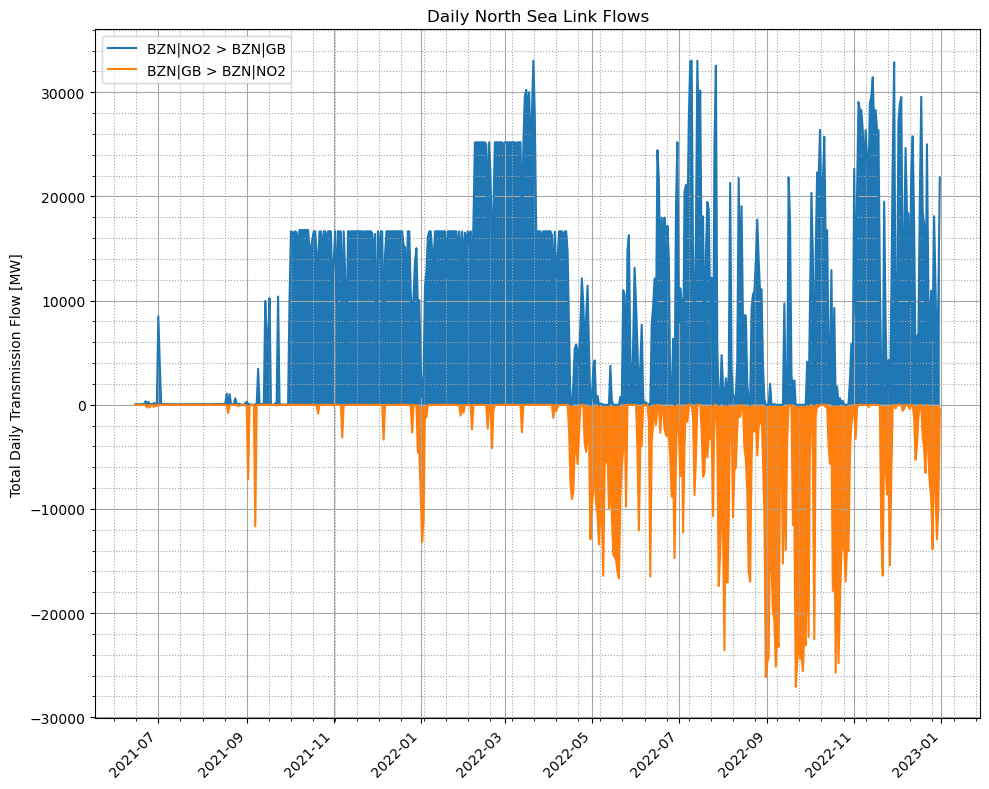

In [9]:
from matplotlib.ticker import MultipleLocator
import matplotlib.pyplot as plt
import numpy as np
import math

fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(10)

plt.title('Daily North Sea Link Flows')
plt.ylabel('Total Daily Transmission Flow [MW]')

Mean = (NSLFlows["BZN|NO2 > BZN|GB [MW]"] - NSLFlows["BZN|GB > BZN|NO2 [MW]"])/math.sqrt(2)

ax.plot(NSLFlows["Date"], NSLFlows["BZN|NO2 > BZN|GB [MW]"], label="BZN|NO2 > BZN|GB")
ax.plot(NSLFlows["Date"], -NSLFlows["BZN|GB > BZN|NO2 [MW]"], label="BZN|GB > BZN|NO2")
#ax.plot(NSLFlows["Date"], Mean, label="RMS", color='black')

plt.legend()
plt.grid(visible=True, which='major', color='0.65', linestyle='-')
plt.grid(visible=True, which='minor', color='0.65', linestyle=':')

ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()

fig.autofmt_xdate()

print(ax.get_xlim())

plt.tick_params(axis='x', which='major', labelsize=10)
plt.xticks(rotation=45, ha='right')
#plt.xlim(18591.55, 19379.8)
plt.tight_layout()

plt.fill_between(NSLFlows["Date"], NSLFlows["BZN|NO2 > BZN|GB [MW]"])
plt.fill_between(NSLFlows["Date"], -NSLFlows["BZN|GB > BZN|NO2 [MW]"])

plt.show()